In [134]:
import numpy as np
import os 
os.chdir('C:\\Users\\Pruthivi\\Desktop\\2_Avyakt\\Baselines - Copy')

In [135]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Baseline_Mesonet.ipynb',
 'Data_face',
 'delete',
 'final_Model.h5',
 'metadata',
 'Predict.ipynb',
 'Preprocessing.ipynb',
 'temp',
 'Test',
 'X_Full.npy',
 'y_Full.npy']

In [136]:
import pandas as pd
file = pd.read_csv('metadata')

C:\Users\Pruthivi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [137]:
file.head()

filename  video.@index video.@codec_time_base  video.@width  \
0  hrundztjfb.mp4             0            2500/150301          1920   
1  uyfnfvsxez.mp4             0                50/2997          1920   
2  yknlciphae.mp4             0                50/2997          1920   
3  zfyczzssiz.mp4             0                50/2997          1920   
4  kggbciadwj.mp4             0               125/7501          1080   

   video.@height video.@sample_aspect_ratio video.@display_aspect_ratio  \
0           1080                        1:1                        16:9   
1           1080                        NAN                         NAN   
2           1080                        1:1                        16:9   
3           1080                        1:1                        16:9   
4           1920                        1:1                        9:16   

   video.@level video.@r_frame_rate video.@time_base  ...        original  \
0            40         150301/5000         1/150301  ...  vvrlglaepq.mp4   
1            40            2997/100          1/11988  ...             NAN   
2            40            2997/100          1/11988  ...  ahesnzswur.mp4   
3            40            2997/100          1/11988  ...  jdvzqjihud.mp4   
4            40            7501/250          1/15002  ...             NAN   

               folder  wav.hash.cnt  original.cnt  \
0  dfdc_train_part_12           3.0           2.0   
1  dfdc_train_part_12           2.0           NaN   
2  dfdc_train_part_12           6.0           5.0   
3  dfdc_train_part_12           7.0           6.0   
4  dfdc_train_part_12           9.0           NaN   

                                md5                          md5.orig  \
0  7b1db59bdb78179aa3ed78a4270ed063  d98cd8af0ba7ce2a51acefb2c0502b71   
1  62c47bd354599ce0fad65d28ef4b78b9                               NaN   
2  a0e4d1f8bf2636def22dc2f2b21187dd  3bb70580dbf21c4719f17c4e4617c398   
3  d641ebd07badeb89c0d389019d9f7e72  c77170df2cc8b40ef1d39b6d79105321   
4  7de3ddacab0c9109e2a985d2c03244ea                               NaN   

                wav.hash          wav.hash.orig               pxl.hash  \
0   6877743394119074431s   6877743394119074431s   4312499372455908935s   
1  -4734951634879773329s                    NaN  17835547769154037975s   
2  -5599986156292069640s  -5599986156292069640s  16356267960363338360s   
3  -1564427678199738496s  -1564427678199738496s  12983824148373679782s   
4  -1251615899500302547s                    NaN    970391495631676767s   

           pxl.hash.orig  
0  16061268809469102567s  
1                    NaN  
2  14219253130038039922s  
3   6108291220829004959s  
4                    NaN  

[5 rows x 35 columns]

In [139]:
import tqdm.notebook as tq
import numpy as np
import os
from PIL import Image

In [140]:
!pip install opencv-python

In [142]:
!pip install torch

In [14]:
# import cv2
# real_data_X = list()
# real_data_y = list()
# num1 = 256
# num2 = 256
# for fold in tq.tqdm(os.listdir(Real_path)):
#   new_path = os.path.join(Real_path, fold)
#   c = 0
#   for frames in os.listdir(new_path):
#     if(c == 150):
#         break
#     c = c + 1
#     #print('Frame {}'.format(frames))
#     path_a = os.path.join(new_path,frames)
#     img = cv2.imread(path_a)
#     new_img = cv2.resize(img, (num2, num1))
#     real_data_X.append(new_img)
#     real_data_y.append(1)
#   #print(fold)

In [15]:
# import cv2
# fake_data_X = list()
# fake_data_y = list()
# num1 = 256
# num2 = 256
# for fold in tq.tqdm(os.listdir(Fake_path)):
#   new_path = os.path.join(Fake_path, fold)
#   c = 0
#   for frames in os.listdir(new_path):
#     if c == 20:
#         break
#     c = c + 1
#     #print('Frame {}'.format(frames))
#     path_a = os.path.join(new_path,frames)
#     img = cv2.imread(path_a)
#     new_img = cv2.resize(img, (num2, num1))
#     fake_data_X.append(new_img)
#     fake_data_y.append(0)
#   #print(fold)

In [17]:
# np.array(real_data_X).shape, np.array(fake_data_X).shape

In [18]:
# X = np.concatenate((real_data_X, fake_data_X))
# y = np.concatenate((real_data_y, fake_data_y))

In [146]:
import os
import glob
import json
import torch
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from facenet_pytorch import MTCNN

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Running on device: {device}')

In [6]:
# #30 GB of X numpy array of Video processed to frames load it to train model again
# X = np.load('X_full.npy')
# y = np.load('y_full.npy')

In [7]:
X.shape, y.shape

((159116, 256, 256, 3), (159116,))

In [11]:
# #Run after train-test-split to clear memory
# X = 0
# y = 0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((101833, 256, 256, 3),
 (101833,),
 (31824, 256, 256, 3),
 (31824,),
 (25459, 256, 256, 3),
 (25459,))

In [12]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

Image_width = 256

class Classifier:
    def __init__():
        self.model = 0
    
    #Method for Predicting 
    def predict(self, x):
        return self.model.predict(x)
    
    # For Fitting the Model Training Data
    def fit(self, x, y, epochs = 10, verbose = 1, batch_size = 256, validation_data = (X_val,y_val)):
        with tf.device('/device:GPU:0'):
            return self.model.fit(x, y,epochs=epochs,verbose=verbose,batch_size = batch_size,validation_data = validation_data)
    
    #For Accuracy
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    # To Load the Model
    def load(self, path):
        self.model.load_weights(path)


In [13]:
class InceptionConv(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    
    def init_model(self):
        x = Input(shape = (Image_width, Image_width, 3))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x2_a = self.InceptionLayer(3, 4, 4, 2)(x2)
        x2_a = BatchNormalization()(x2_a)
        x2_a = MaxPooling2D(pool_size=(2, 2), padding='same')(x2_a) 
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2_a)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        x5 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x4)
        x5 = BatchNormalization()(x5)
        x5 = MaxPooling2D(pool_size=(4, 4), padding='same')(x5)
        
        y = Flatten()(x5)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [14]:
#GPU Testing 
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

['/device:CPU:0', '/device:GPU:0']

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
classifier_3 = InceptionConv()

In [16]:
# history_3 = classifier_3.fit(X_train, y_train, epochs = 30, batch_size = 256 , verbose = 1, validation_data = (X_val,y_val))

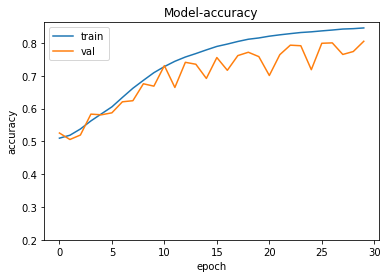

In [28]:
#For Plotting
import matplotlib.pyplot as plt
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(bottom = 0.2)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

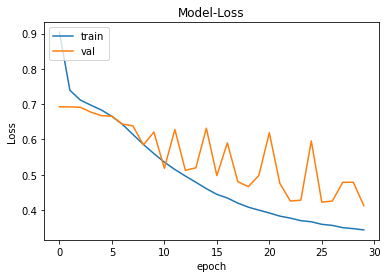

In [29]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model-Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.ylim(top = 0.5,bottom = 0)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
y_pred1 = classifier_3.predict(X_test)
# y_pred2 = classifier_2.predict(X_test)

In [20]:
y_pred1

array([[0.9965107 ],
       [0.9981116 ],
       [0.99950147],
       ...,
       [0.9998073 ],
       [0.99212873],
       [0.9952998 ]], dtype=float32)

In [31]:
#Since our Model predicts probability of belonging to class 0 or 1 for testing purpose we have taken the threshold of 0.5.
def predictfromprob(y_pred):
    temp = []
    for i in range(len(y_pred)):
        if(y_pred[i] >0.5):
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [23]:
confident_strategy(y_pred1)

0.9927111

In [148]:
from sklearn.metrics import accuracy_score
# print('Accuracy InceptionConv is {}'.format(accuracy_score(predictfromprob(y_pred1),y_test)))

Accuracy InceptionConv is 0.8048642533936652


In [33]:
train_pred1 = classifier_3.predict(X_train)

In [149]:
print('Train Accuracy MesonetInception is {}'.format(accuracy_score(predictfromprob(train_pred1),y_train)))

Train Accuracy InceptionConv is 0.8561664686300119


In [66]:
from sklearn.metrics import classification_report
temp = classification_report(y_test, predictfromprob(y_pred1), output_dict=True)

In [69]:
df = pd.DataFrame(temp).transpose()
df[['precision', 'recall', 'f1-score']]

precision    recall  f1-score
0              0.845444  0.746878  0.793110
1              0.772668  0.863033  0.815354
accuracy       0.804864  0.804864  0.804864
macro avg      0.809056  0.804956  0.804232
weighted avg   0.809113  0.804864  0.804215

In [44]:
import itertools
from collections import defaultdict
from tqdm import tqdm_notebook as tqdm
def confusion_matrix2(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, figsize=(7,7), path=None, filename=None):
        """
        cm: confusion matrix to be plotted.
        classes: array of labels or class names.
        title: title of the confusion matrix.
        cmap: color of the plot matrix.
        figsize: tupple (width, height) representiong size of the plot.
        path: destination where the plot image will be saved.
        filename: name to save the file with on the specified path. (if None, title is used)
        
        # Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        cm = cm.astype(np.int64)
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Frame by Frame Classification')
        plt.tight_layout()
        
        if path:
            if filename is None:
                plt.savefig(os.path.join(path, title + '.png'))
            else:
                plt.savefig(os.path.join(path, filename + '.png'))
        plt.show()

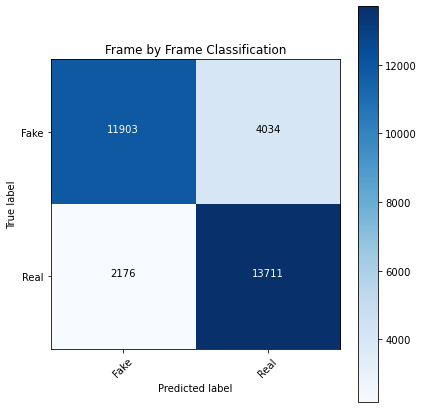

In [45]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, predictfromprob(y_pred1))
confusion_matrix2(cm1, classes=['Fake','Real'],title='Confusion matrix- Model',
                           filename='Confusion Matrix', figsize=(6,6))

In [76]:
# classifier_3.model.save('final_Model.h5')

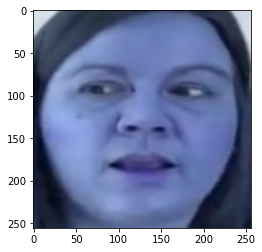

In [151]:
import matplotlib.pyplot as plt
image = plt.imshow(X_train[1000])                           

In [128]:
model = classifier_3.model
from tensorflow.keras.models import Model

In [66]:
temp = X_train[1000].reshape(-1,256,256,3)

In [67]:
temp.shape

(1, 256, 256, 3)

In [104]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [105]:
visualization_model =Model(inputs = model.input, outputs = successive_outputs)

In [108]:
successive_feature_maps = visualization_model.predict(temp)

In [109]:
model_c = model

(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 2)
(1, 256, 256, 1)
(1, 256, 256, 4)
(1, 256, 256, 4)
(1, 256, 256, 2)
(1, 256, 256, 11)
(1, 256, 256, 11)
(1, 128, 128, 11)
(1, 128, 128, 4)
(1, 128, 128, 4)
(1, 128, 128, 2)
(1, 128, 128, 2)
(1, 128, 128, 4)
(1, 128, 128, 4)
(1, 128, 128, 2)
(1, 128, 128, 12)
(1, 128, 128, 12)
(1, 64, 64, 12)
(1, 64, 64, 4)


<ipython-input-116-936408e069cb>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(1, 64, 64, 4)
(1, 64, 64, 2)
(1, 64, 64, 3)
(1, 64, 64, 4)
(1, 64, 64, 4)
(1, 64, 64, 2)
(1, 64, 64, 13)
(1, 64, 64, 13)
(1, 32, 32, 13)
(1, 32, 32, 16)
(1, 32, 32, 16)
(1, 16, 16, 16)
(1, 16, 16, 16)
(1, 16, 16, 16)
(1, 4, 4, 16)
(1, 4, 4, 16)
(1, 4, 4, 16)
(1, 1, 1, 16)
(1, 16)
(1, 16)
(1, 16)
(1, 16)
(1, 1)


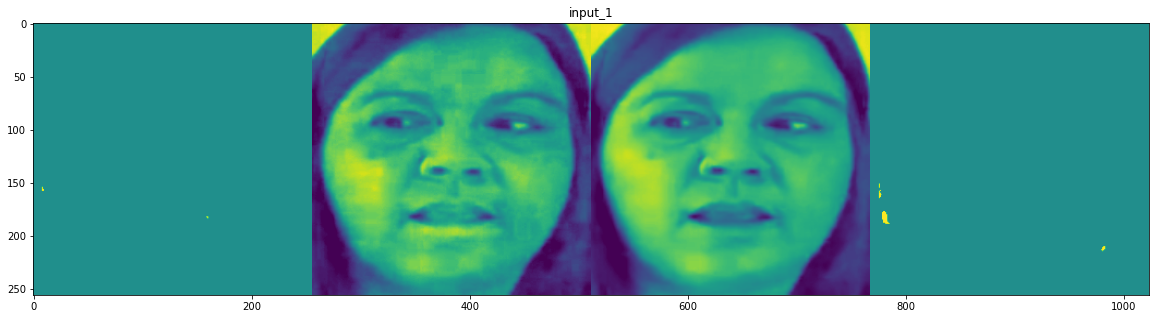

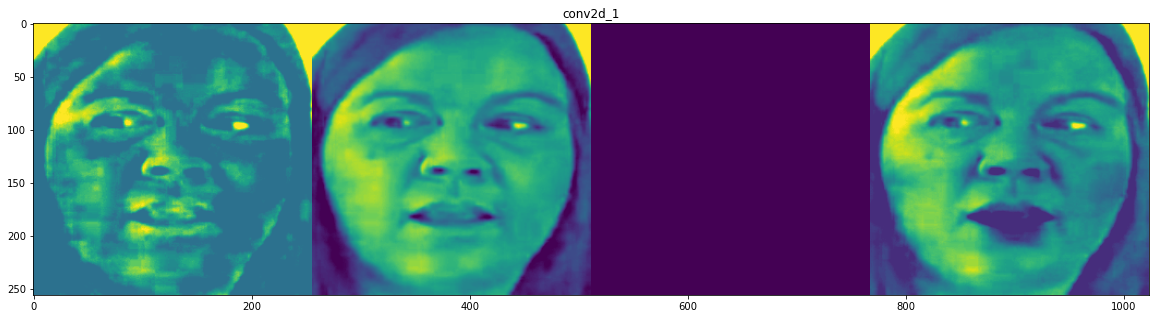

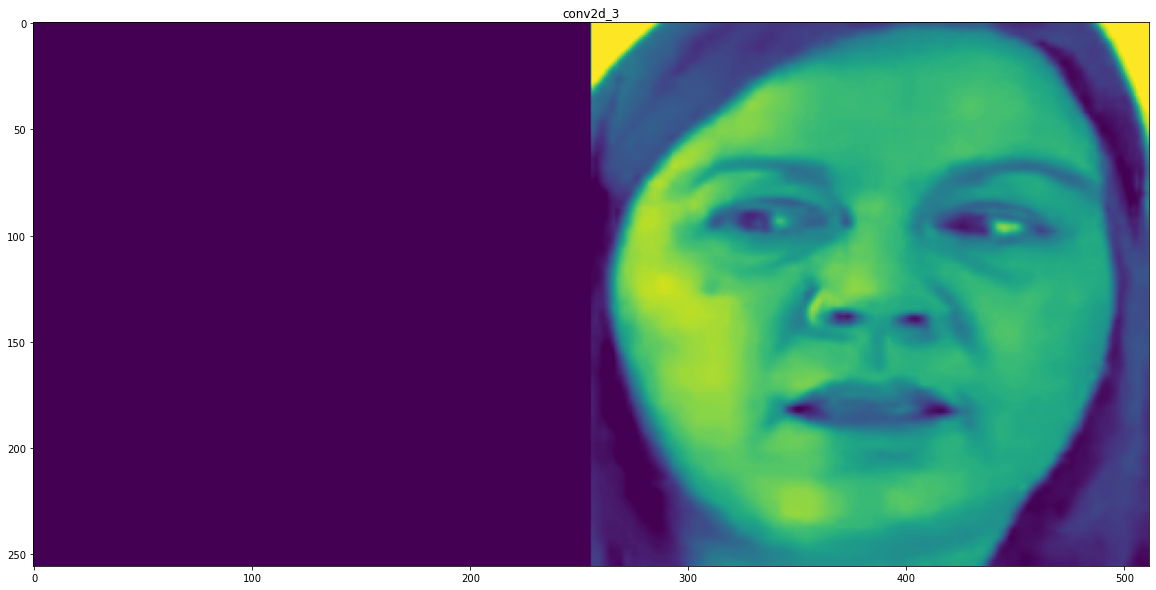

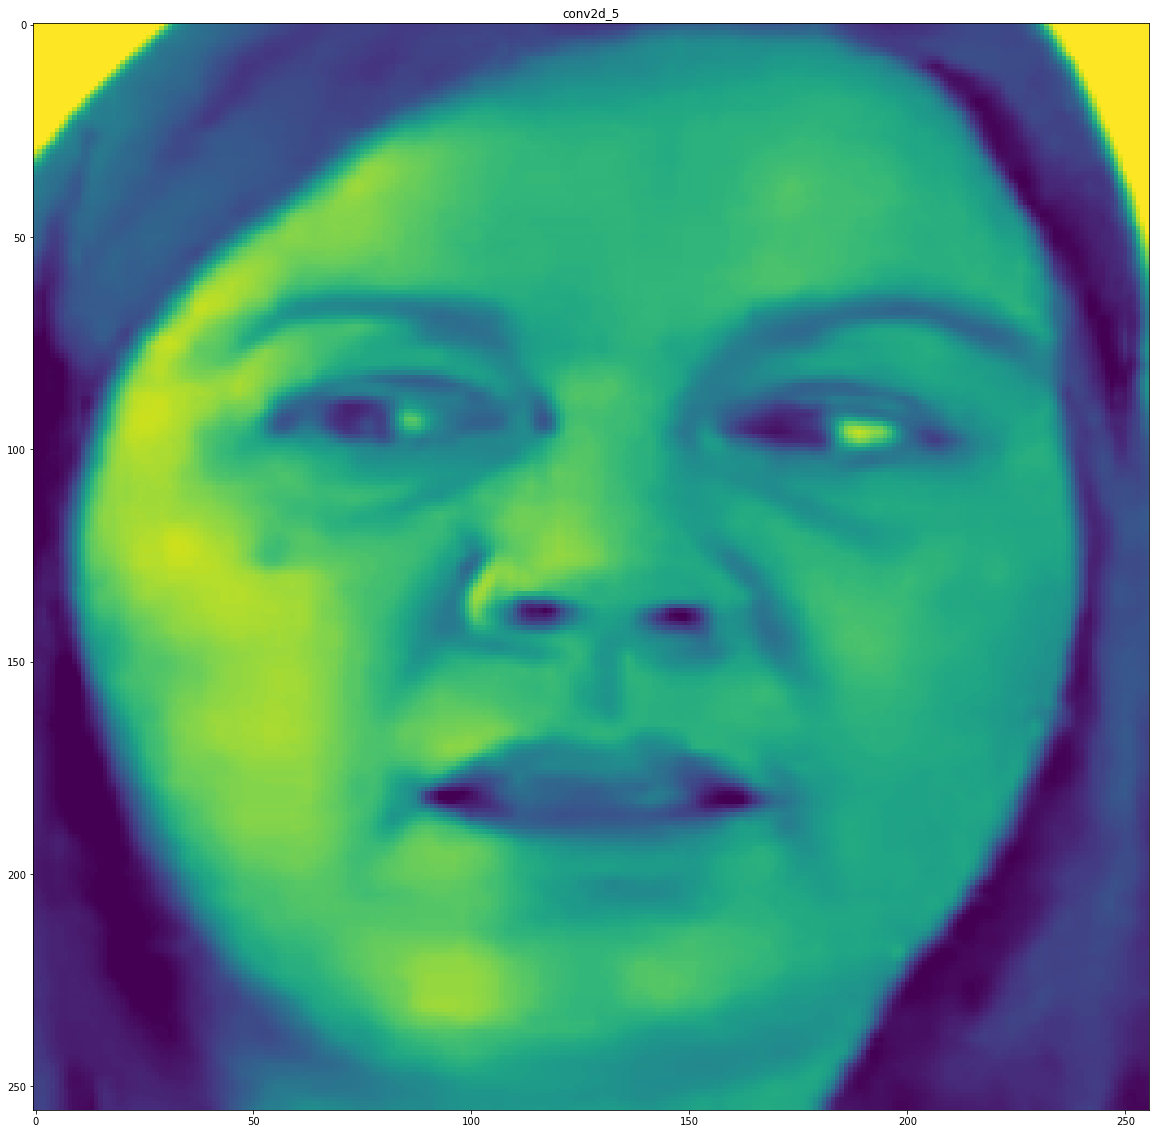

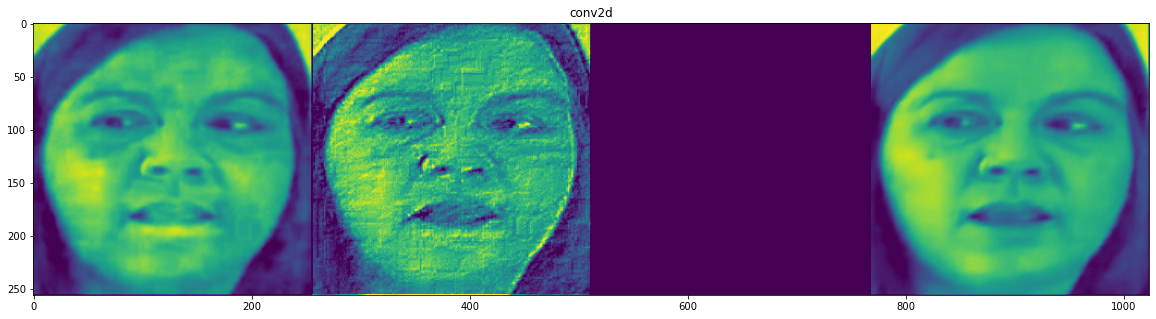

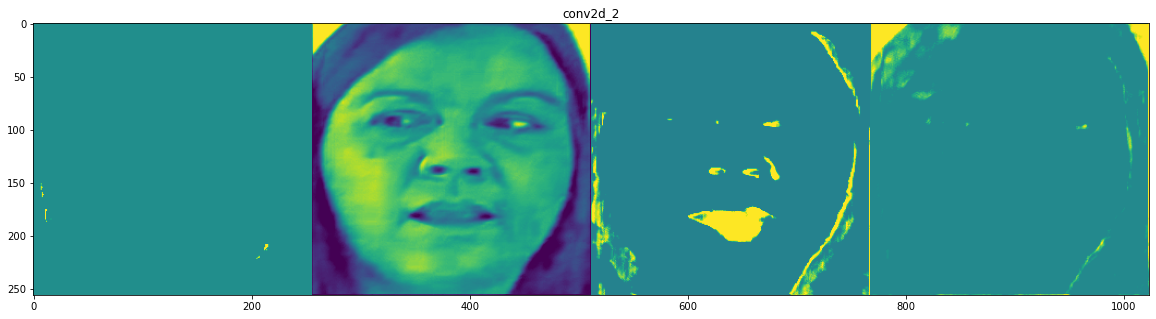

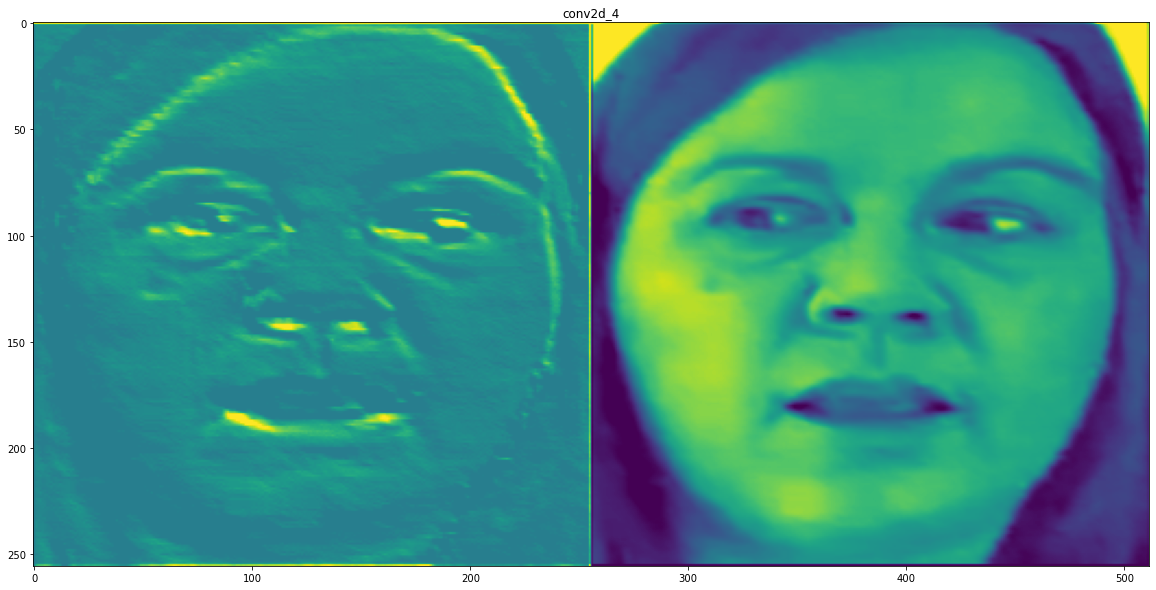

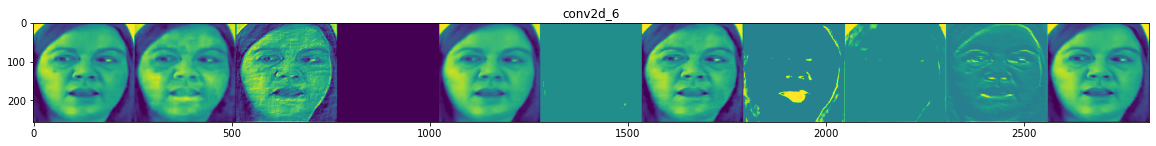

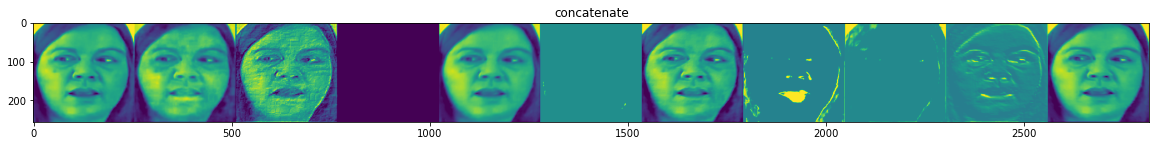

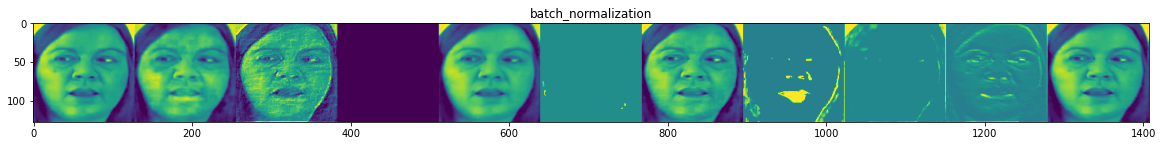

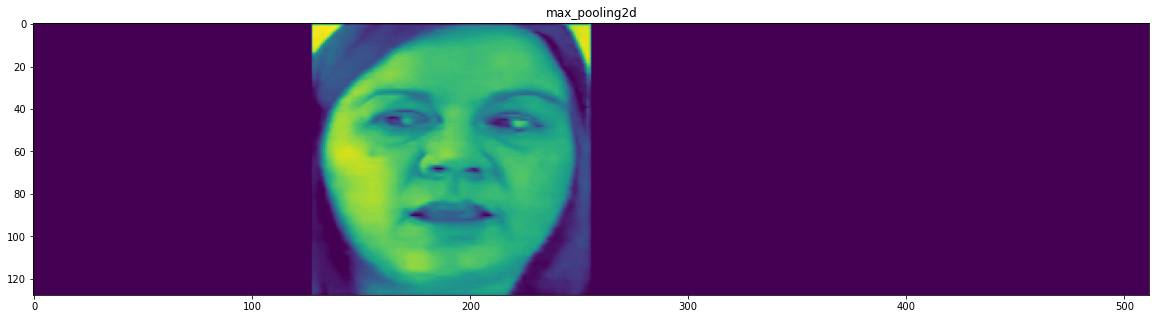

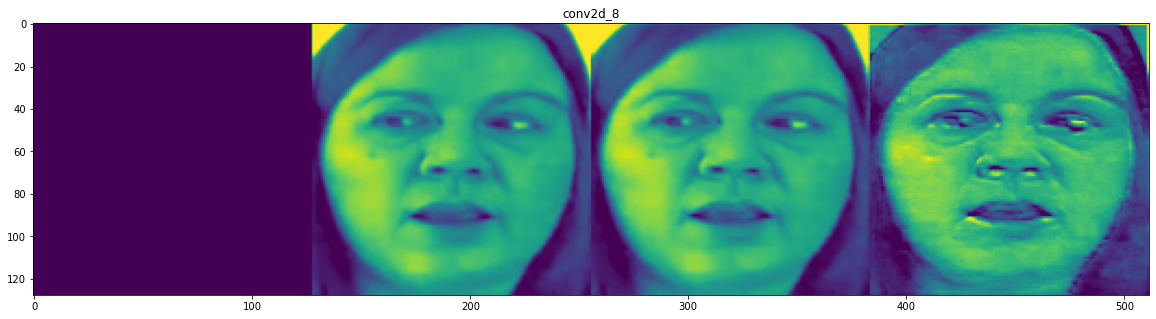

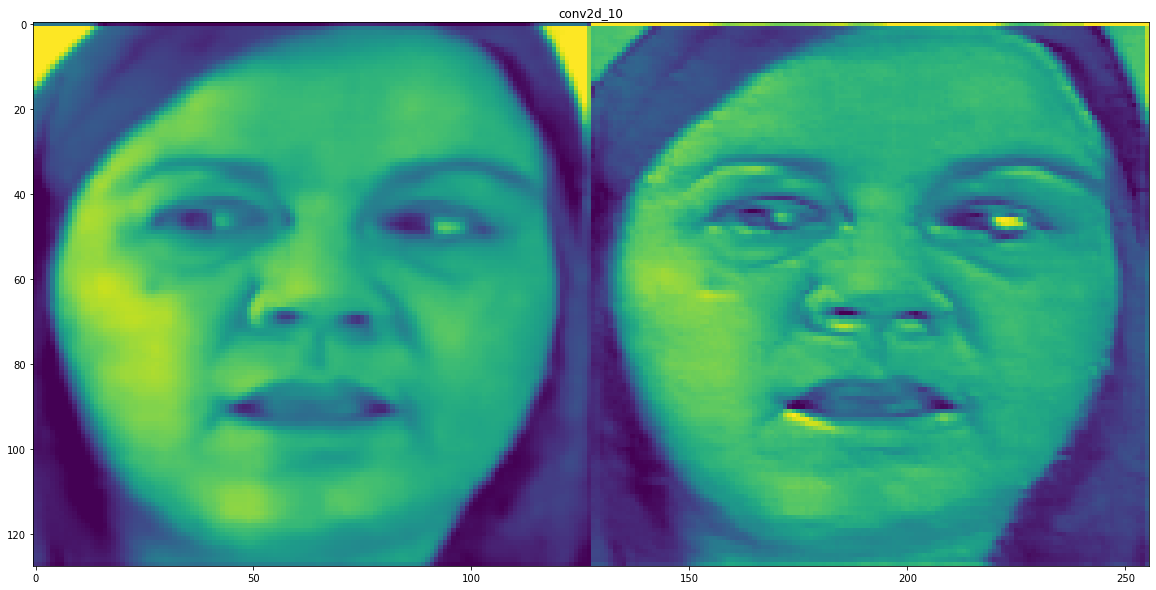

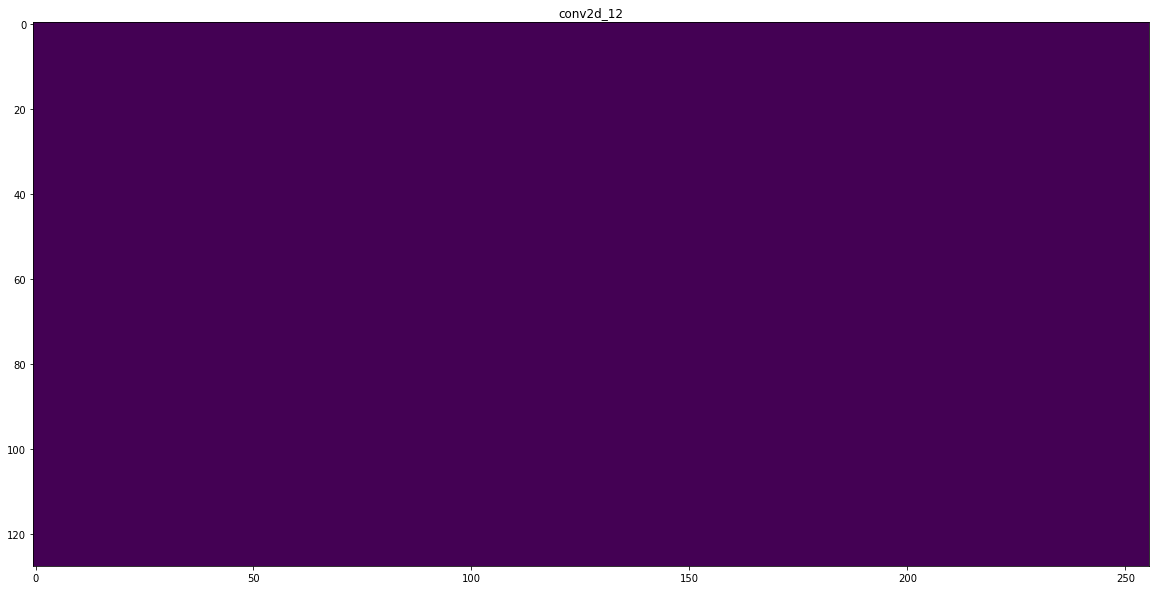

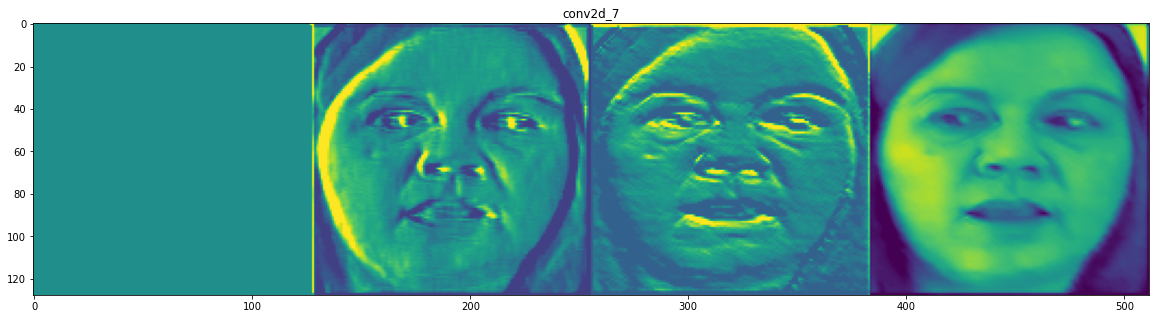

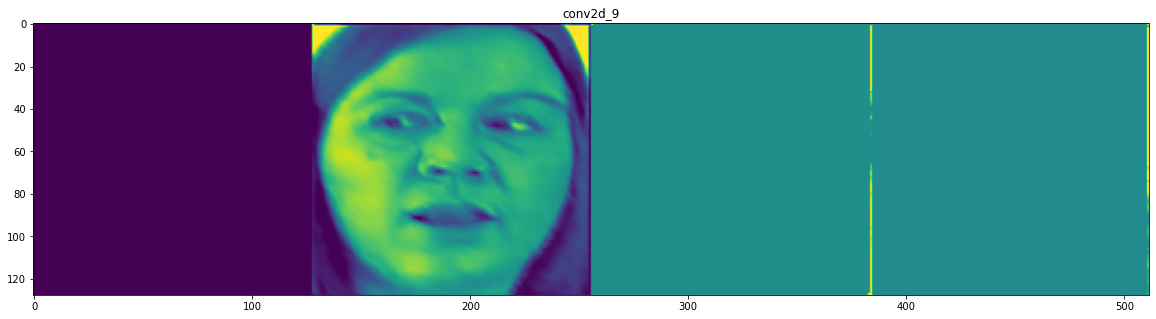

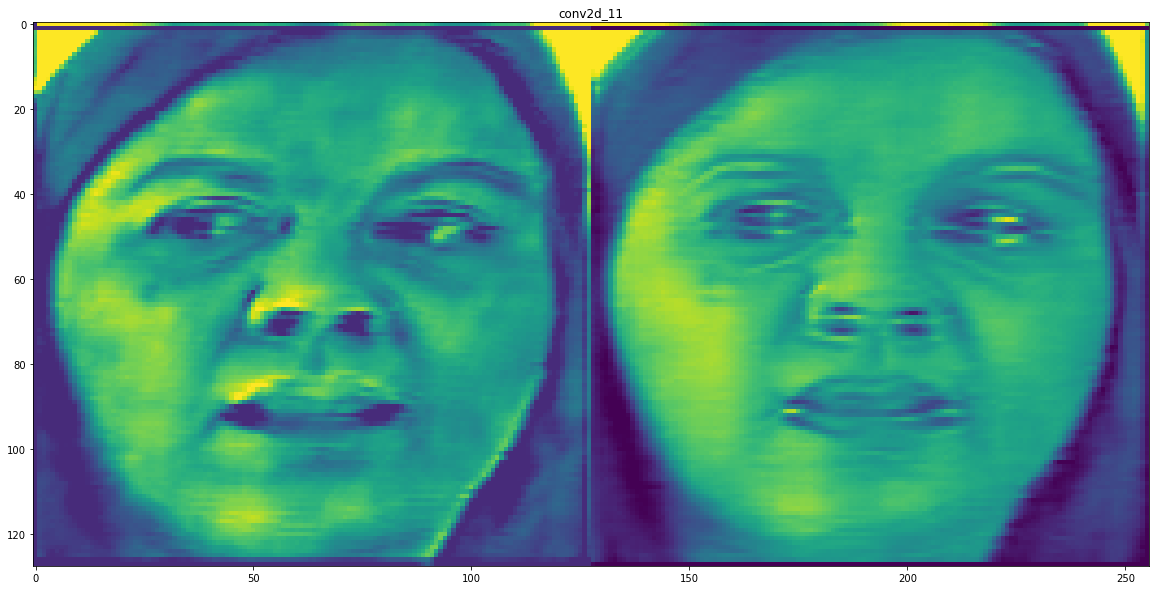

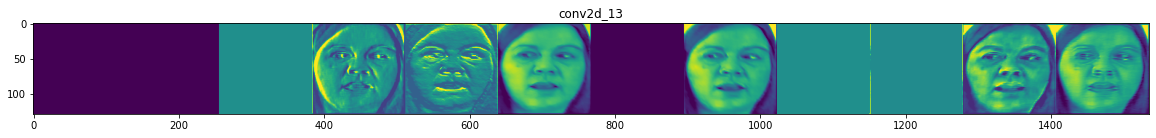

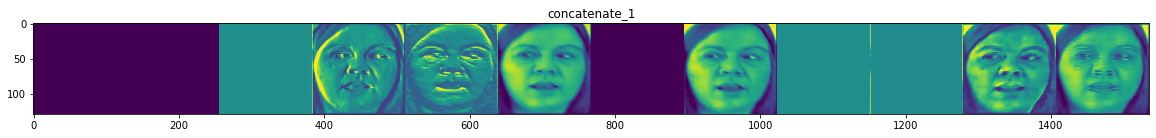

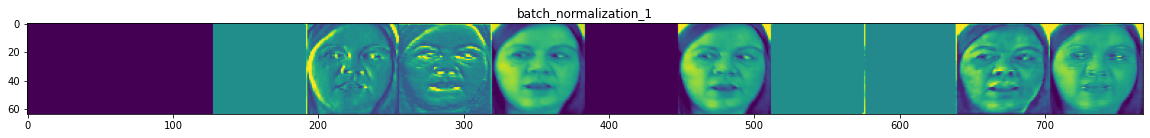

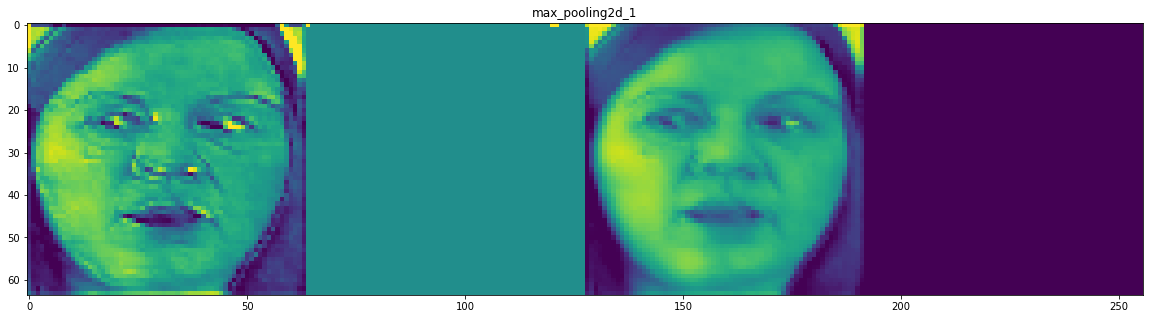

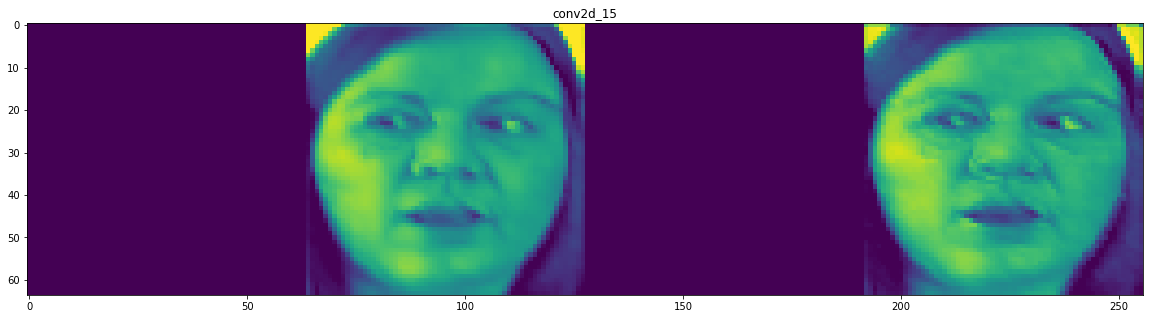

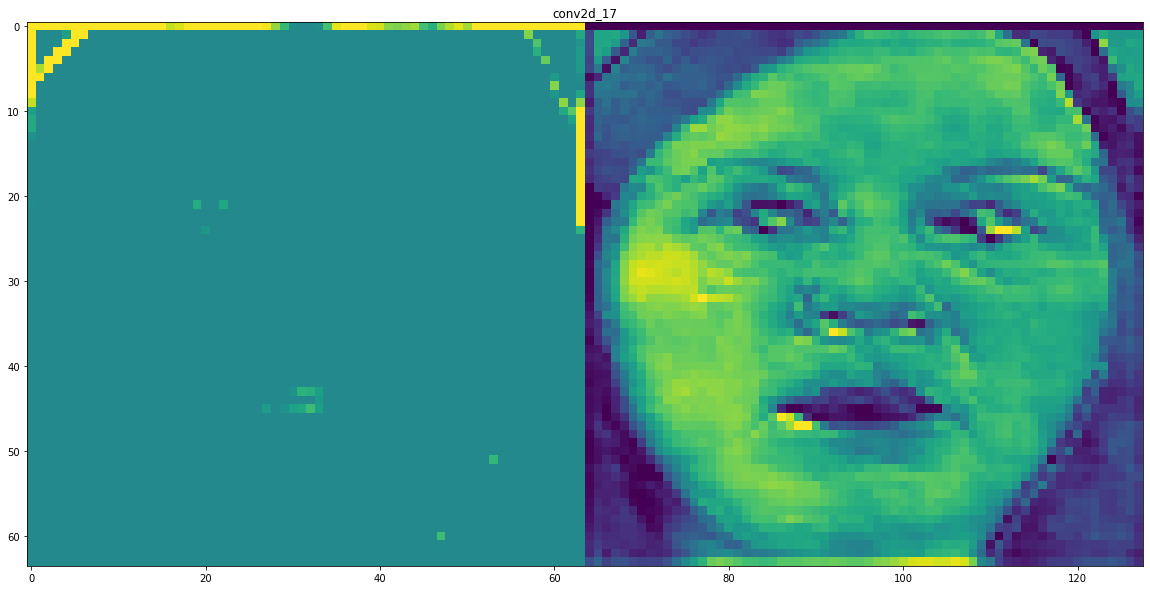

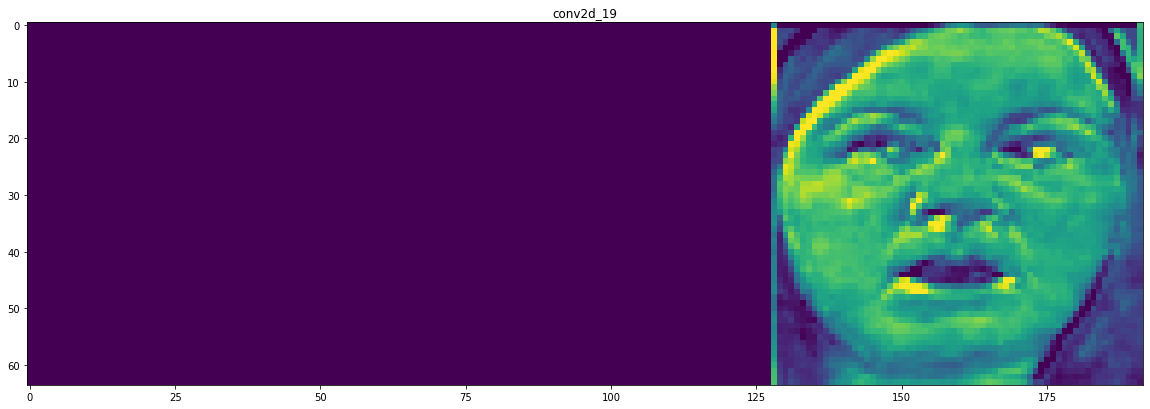

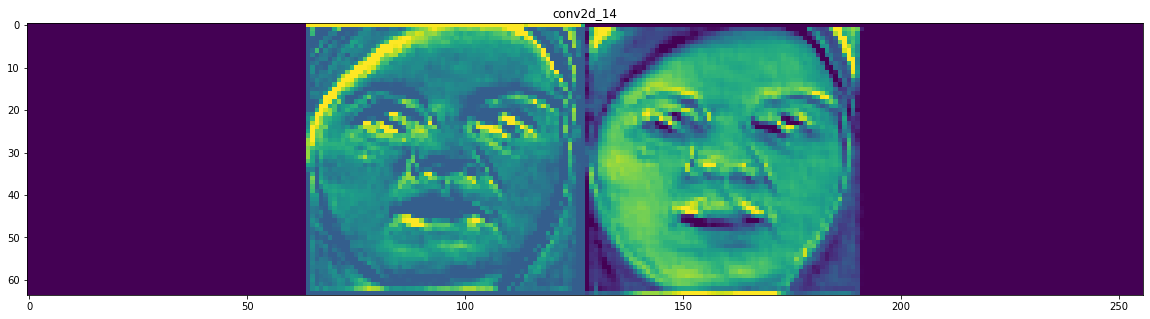

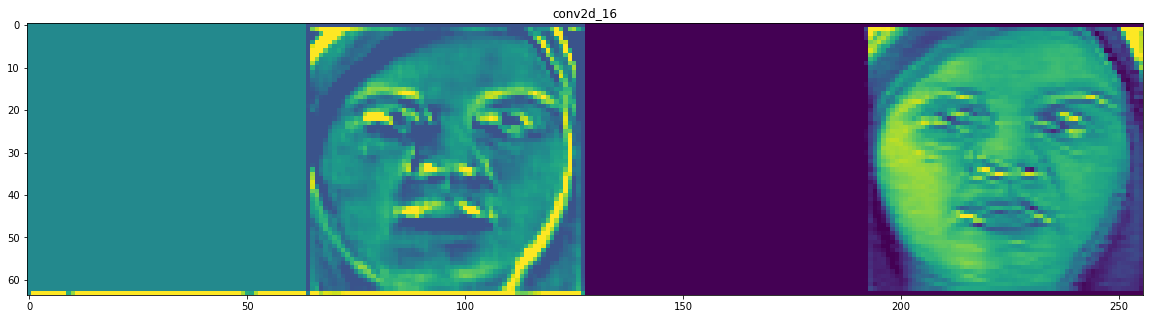

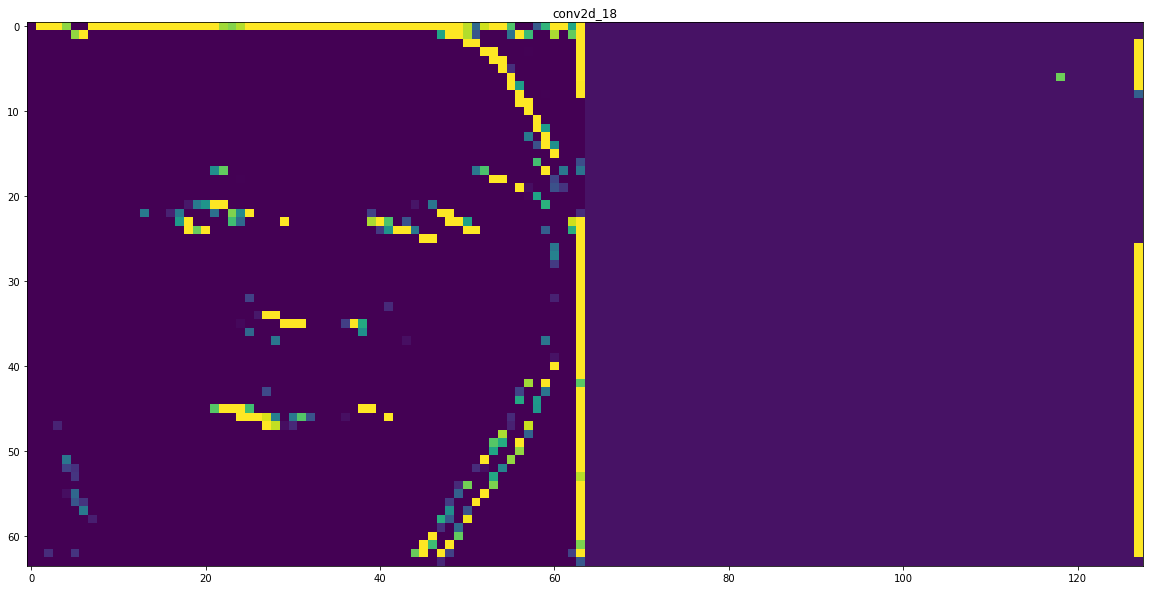

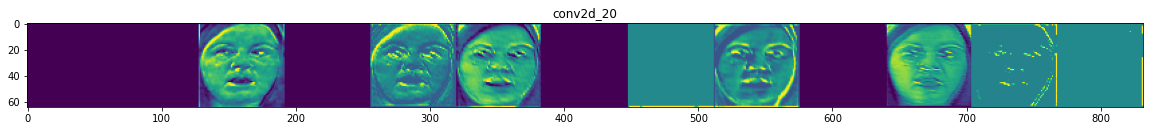

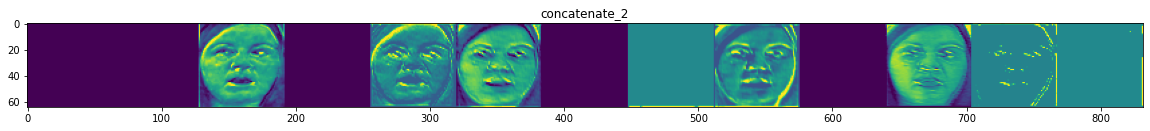

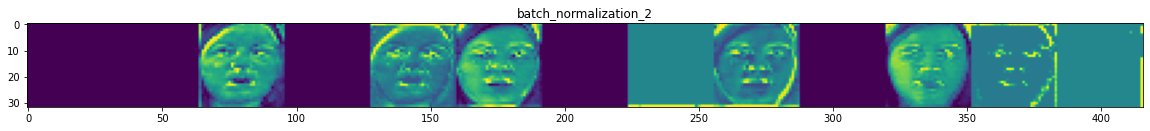

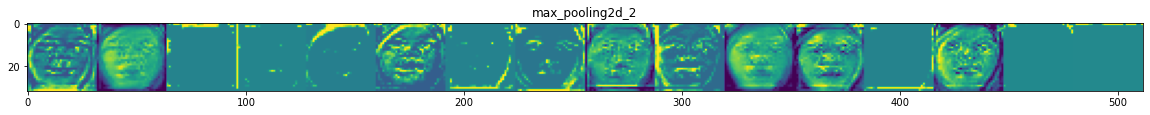

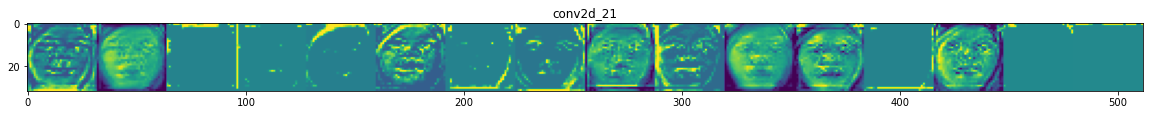

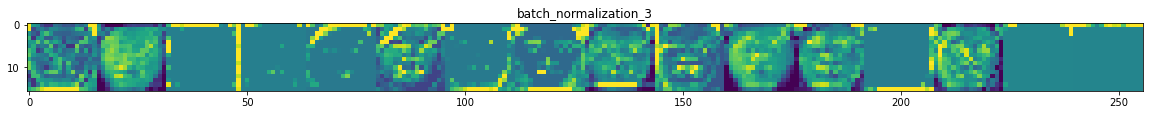

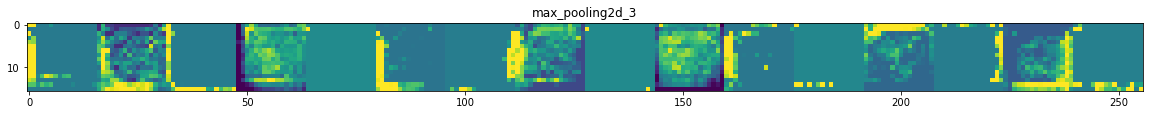

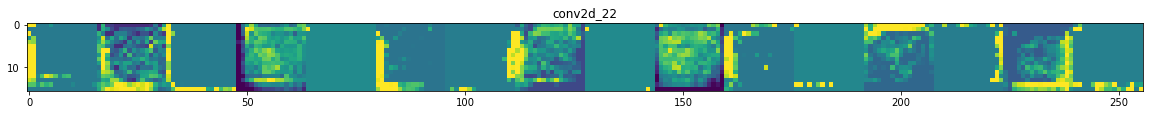

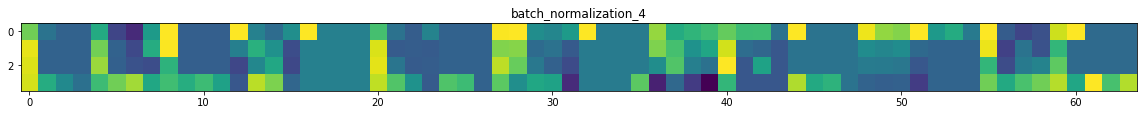

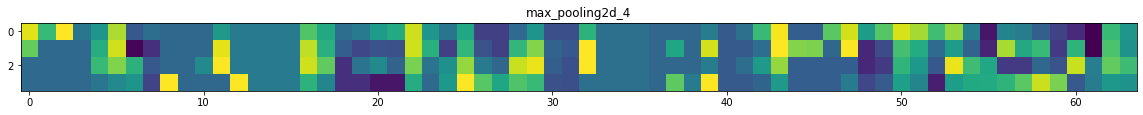

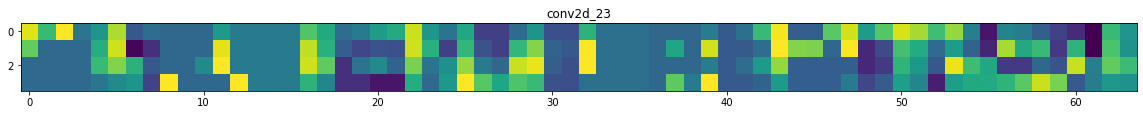

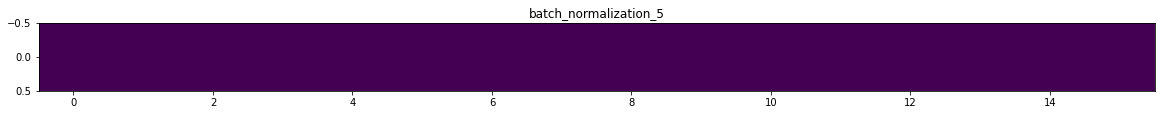

In [116]:
ax = 1;
layer_names = [layer.name for layer in model_c.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
    plt.savefig('Convolutional_feature_map'+layer_name)

In [30]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_1 (1, 1, 3, 4)
conv2d_3 (1, 1, 3, 4)
conv2d_5 (1, 1, 3, 2)
conv2d (1, 1, 3, 1)
conv2d_2 (3, 3, 4, 4)
conv2d_4 (3, 3, 4, 4)
conv2d_6 (3, 3, 2, 2)
conv2d_8 (1, 1, 11, 4)
conv2d_10 (1, 1, 11, 4)
conv2d_12 (1, 1, 11, 2)
conv2d_7 (1, 1, 11, 2)
conv2d_9 (3, 3, 4, 4)
conv2d_11 (3, 3, 4, 4)
conv2d_13 (3, 3, 2, 2)
conv2d_15 (1, 1, 12, 4)
conv2d_17 (1, 1, 12, 4)
conv2d_19 (1, 1, 12, 2)
conv2d_14 (1, 1, 12, 3)
conv2d_16 (3, 3, 4, 4)
conv2d_18 (3, 3, 4, 4)
conv2d_20 (3, 3, 2, 2)
conv2d_21 (5, 5, 13, 16)
conv2d_22 (5, 5, 16, 16)
conv2d_23 (5, 5, 16, 16)


In [31]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [32]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [35]:
import matplotlib.pyplot as pyplot

In [39]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 conv2d_1 (None, 256, 256, 4)
2 conv2d_3 (None, 256, 256, 4)
3 conv2d_5 (None, 256, 256, 2)
4 conv2d (None, 256, 256, 1)
5 conv2d_2 (None, 256, 256, 4)
6 conv2d_4 (None, 256, 256, 4)
7 conv2d_6 (None, 256, 256, 2)
11 conv2d_8 (None, 128, 128, 4)
12 conv2d_10 (None, 128, 128, 4)
13 conv2d_12 (None, 128, 128, 2)
14 conv2d_7 (None, 128, 128, 2)
15 conv2d_9 (None, 128, 128, 4)
16 conv2d_11 (None, 128, 128, 4)
17 conv2d_13 (None, 128, 128, 2)
21 conv2d_15 (None, 64, 64, 4)
22 conv2d_17 (None, 64, 64, 4)
23 conv2d_19 (None, 64, 64, 2)
24 conv2d_14 (None, 64, 64, 3)
25 conv2d_16 (None, 64, 64, 4)
26 conv2d_18 (None, 64, 64, 4)
27 conv2d_20 (None, 64, 64, 2)
31 conv2d_21 (None, 32, 32, 16)
34 conv2d_22 (None, 16, 16, 16)
37 conv2d_23 (None, 4, 4, 16)


In [170]:
import os
import glob
import json
import torch
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from facenet_pytorch import MTCNN

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Running on device: {device}')
import tqdm.notebook as tq
import numpy as np
import os
from PIL import Image
import face_recognition
class FaceExtractor:
    def __init__(self, detector, n_frames=None, resize=None):
        """
        Parameters:
            n_frames {int} -- Total number of frames to load. These will be evenly spaced
                throughout the video. If not specified (i.e., None), all frames will be loaded.
                (default: {None})
            resize {float} -- Fraction by which to resize frames from original prior to face
                detection. A value less than 1 results in downsampling and a value greater than
                1 result in upsampling. (default: {None})
        """

        self.detector = detector
        self.n_frames = n_frames
        self.resize = resize
    
    def __call__(self, filename, save_dir):
        """Load frames from an MP4 video, detect faces and save the results.

        Parameters:
            filename {str} -- Path to video.
            save_dir {str} -- The directory where results are saved.
        """

        # Create video reader and find length
        v_cap = cv2.VideoCapture(filename)
        v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Pick 'n_frames' evenly spaced frames to sample
        if self.n_frames is None:
            sample = np.arange(0, v_len)
        else:
            sample = np.linspace(0, v_len - 1, self.n_frames).astype(int)

        # Loop through frames
        for j in range(v_len):
            success = v_cap.grab()
            if j in sample:
                # Load frame
                success, frame = v_cap.retrieve()
                if not success:
                    continue
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = Image.fromarray(frame)
                
                #image = face_recognition.load_image_file(frame)
                #face_locations = face_recognition.face_locations(frame)
                #print(face_locations)
                #break
                # Resize frame to desired size
                if self.resize is not None:
                    frame = frame.resize([int(d * self.resize) for d in frame.size])

                save_path = os.path.join(save_dir, f'{j}.png')

                self.detector([frame], save_path=save_path)

        v_cap.release()

Running on device: cuda:0


In [175]:
video_path = os.getcwd()+"//Test"

In [22]:
import numpy as np
def confident_strategy(pred, t=0.8):
    pred = np.array(pred)
    sz = len(pred)
    fakes = np.count_nonzero(pred > t)
    # 11 frames are detected as fakes with high probability
    if fakes > sz // 2.5 and fakes > 11:
        return np.mean(pred[pred > t])
    elif np.count_nonzero(pred < 0.2) > 0.9 * sz:
        return np.mean(pred[pred < 0.2])
    else:
        return np.mean(pred)

In [65]:
import shutil
import cv2
from keras.models import load_model
def testing(video_path): 
    face_detector = MTCNN(margin=14, keep_all=True, factor=0.5, device = device).cuda().eval()
    face_extractor = FaceExtractor(detector=face_detector, n_frames=64)
    all_train_videos = glob.glob(os.path.join(video_path, '*.mp4'))
    TMP_DIR = os.getcwd()+'\\delete'
    with torch.no_grad():
        for path in tqdm(all_train_videos):
            file_name = path.split('\\')[-1]

            save_dir = os.path.join(TMP_DIR, file_name.split(".")[0])

            if not os.path.exists(save_dir):
                os.makedirs(save_dir)

            # Detect all faces appear in the video and save them.
            face_extractor(path, save_dir)
        s = os.getcwd()+"\\Test\\001.mp4"
        d = os.getcwd()+"\\Test\\Temp\\"
        shutil.move(s,d)
        path = os.getcwd()+'\\test\\Temp'
        test_data_X = list()
        num1 = 256
        num2 = 256
        c = 0
        new_path = os.getcwd()+'\delete\\001\\'
        for frames in os.listdir(new_path):
            if(c == 32):
                break
            c = c + 1
            path_a = os.path.join(new_path,frames)
            img = cv2.imread(path_a)
            try:
                new_img = cv2.resize(img, (num2, num1))
            except:
                print(e)
            test_data_X.append(new_img)
        print(np.array(test_data_X).shape)
        classifier4 = load_model('final_Model.h5')
        test_data_X = np.array(test_data_X)
        predictions = classifier4.predict(test_data_X)
        if(confident_strategy(predictions) > 0.5):
            print("REAL")
        else:
            print("FAKE")
        

In [202]:
testing(video_path)


(32, 256, 256, 3)
REAL
